<a href="https://colab.research.google.com/github/azar011/Automobile-Sales-Analysis-Visualization/blob/main/Automobile_Sales_Analysis_Visualization_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="toc"></a>
<p><center style="color:#b58a12; font-family: 'Dancing Script', cursive; font-size:25px;">Thanks for visiting my notebook </center></p>

<div style="background-color:#faf3cf; padding: 10px;">
<div class="alert alert-block alert-secondary" style="font-size:18px; font-family:verdana;">  Feel free to customize or fork the notebook to suit your needs. If you find it helpful, please consider giving it an upvote ⬆️. It helps others discover the notebook too! Your support motivates me to create more content like this</div>

<center><img  src="https://cdn.dribbble.com/users/3848091/screenshots/8979647/media/229dc8a542685304711bada35be5e67b.gif" alt="Image" width="350" height="150" > </center>

## <b><span style='color:#fa762f'> </span><span style='color:#b58a12'> Import Libraries & Load Data </span></b>

In [8]:
#Import the Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')

In [42]:
url = "https://raw.githubusercontent.com/azar011/Automobile-Sales-Analysis-Visualization/079b335115213ee907cf770fce376231acfa979b/Auto%20Sales%20data.csv"
df = pd.read_csv(url, parse_dates=['ORDERDATE'], dayfirst=True)

## <b><span style='color:#fa762f'>  </span><span style='color:#b58a12'> About the Data</span></b>

<p style="font-size:16px; font-family:verdana; line-height: 1.7em"> - In the data,  **days Since order** is taken as 2022-06-07 for the difference, we will be removing it & creating new Days difference baseline as 02-06-2020 (1st June 2020)</p>

In [43]:
#Dimentions of the data
df.shape

(2747, 20)

<p style="font-size:16px; font-family:verdana; line-height: 1.7em"> - Let's drop days since last order & create a new feature having time difference as : DateLast order - 06-01-2020</p>

In [44]:
# Create a new feature 'DAYS_SINCE_LASTORDER' based on the time difference
# Drop the 'DAYS_SINCE_LASTORDER' column
df = df.drop('DAYS_SINCE_LASTORDER', axis=1)

# Create a new feature 'DAYS_SINCE_LASTORDER' based on the time difference
from datetime import datetime

temp_date = datetime(2020, 6, 1)  # Define the specific date
df['DAYS_SINCE_LASTORDER'] = (temp_date- df['ORDERDATE']).dt.days


In [13]:
#Checking first & last 5 samples of the data
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,DAYS_SINCE_LASTORDER
0,10107,30,95.70,2,2871.00,2018-02-24,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,828
1,10121,34,81.35,5,2765.90,2018-05-07,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,756
2,10134,41,94.74,2,3884.34,2018-07-01,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,701
3,10145,45,83.26,6,3746.70,2018-08-25,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,646
4,10168,36,96.66,1,3479.76,2018-10-28,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,2019-12-02,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small,182
2743,10373,29,137.19,1,3978.51,2020-01-31,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium,122
2744,10386,43,125.99,4,5417.57,2020-03-01,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium,92
2745,10397,34,62.24,1,2116.16,2020-03-28,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small,65


In [14]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   STATUS                2747 non-null   object        
 7   PRODUCTLINE           2747 non-null   object        
 8   MSRP                  2747 non-null   int64         
 9   PRODUCTCODE           2747 non-null   object        
 10  CUSTOMERNAME          2747 non-null   object        
 11  PHONE                 2747 non-null   object        
 12  ADDRESSLINE1          2747 non-null   object        
 13  CITY              

### ✍🏼<b><span style='color:#fa762f'> </span><span style='color:#ad8b2b'> Data Charactristics </span></b>
<div style="border-radius: 1px; border: # solid; padding: 10px; background-color: #fcf8e3; text-align: left;">
<ul style="font-size:20px; font-family:verdana; line-height: 1.5em">
- The dataset contains 2747 entries with 20 columns.<br>
- All columns have 2747 non-null values, hence no missing found<br>
- Key columns include sales transaction details, customer information, product details, order status, and recency information.<br>
- Data types vary across columns, including floats, datetime, and objects.

#### Numerical features

<p style="font-size:16px; font-family:verdana; line-height: 1.7em"> - Since ORDERNUMBER is not relevant for the EDA here, we will drop for Exploratory data analysis & visualizations</p>


In [15]:
df_num = df.select_dtypes(include=['float64', 'int64']).drop(columns=['ORDERNUMBER'])
print(df_num.columns, len(list(df_num.columns.values)))

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'MSRP',
       'DAYS_SINCE_LASTORDER'],
      dtype='object') 6


### Categorical Features

<p style="font-size:16px; font-family:verdana; line-height: 1.7em">- We do not need below columns for analysis hence we will exlude from plots: 'PHONE','ADDRESSLINE1', 'CONTACTLASTNAME','CONTACTFIRSTNAME'</p>

In [16]:
df_cat = df.select_dtypes(include = ['object']).drop(columns=['PHONE','ADDRESSLINE1', 'CONTACTLASTNAME','CONTACTFIRSTNAME'])
print(df_cat.columns, len(list(df_cat.columns.values)))


Index(['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY',
       'POSTALCODE', 'COUNTRY', 'DEALSIZE'],
      dtype='object') 8


<a id="toc"></a>

<a href="#toc" style="background-color: #ad8b2b; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

## <b><span style='color:#fa762f'>  </span><span style='color:#b58a12'> Descriptive Summary</span></b>

In [17]:
#Descriptive Summary of the dataset - Numeric features

display(round(df_num.describe(),2).T)

,count,mean,std,min,25%,50%,75%,max
QUANTITYORDERED,2747.0,35.10,9.76,6.00,27.00,35.00,43.00,97.00
PRICEEACH,2747.0,101.10,42.04,26.88,68.74,95.55,127.10,252.87
ORDERLINENUMBER,2747.0,6.49,4.23,1.00,3.00,6.00,9.00,18.00
SALES,2747.0,3553.05,1838.95,482.13,2204.35,3184.80,4503.09,14082.80
MSRP,2747.0,100.69,40.11,33.00,68.00,99.00,124.00,214.00
DAYS_SINCE_LASTORDER,2747.0,384.09,230.23,1.00,197.00,343.00,571.00,877.00


In [18]:
#Descriptive Summary of the dataset - Categorical features

df.select_dtypes(include = ['object']).describe().T


,count,unique,top,freq
STATUS,2747,6,Shipped,2541
PRODUCTLINE,2747,7,Classic Cars,949
PRODUCTCODE,2747,109,S18_3232,51
CUSTOMERNAME,2747,89,Euro Shopping Channel,259
PHONE,2747,88,(91) 555 94 44,259
ADDRESSLINE1,2747,89,"C/ Moralzarzal, 86",259
CITY,2747,71,Madrid,304
POSTALCODE,2747,73,28034,259
COUNTRY,2747,19,USA,928
CONTACTLASTNAME,2747,76,Freyre,259


### ✍🏼<b><span style='color:#fa762f'> </span><span style='color:#b58a12'> Insights </span></b>

<div style="border-radius: 1px; border: # solid; padding: 1px; background-color: #fcf8e3; text-align: left;">

<ul style="font-size:20px; font-family:verdana; line-height: 1.5em">
1. <b>Sales Amount</b>: The average sales amount per transaction is approximately `3,553`. Customers make purchases ranging from '482.13' to '14,082.80.'<br>
2. <b>Quantity Ordered</b> On average, customers order approximately 35 items per transaction, with a minimum of 6 and a maximum of 97 items.<br>
3. <b>Price Each</b> The average price of each item in an order is approximately 101. Prices vary between a minimum of 26.88 and a maximum of 252.87.<br>
4. <b>Manufacturer's Suggested Retail Price (MSRP</b> The average MSRP is approximately 00.69, with prices ranging from 33 to 214.<br>
5. <b>Order Status</b> The most common order status is "Shipped," occurring 2541 times.<br>
6. <b>Product Line</b> "Classic Cars" is the dominant product line with 949 entries.<br>
7. <b>Customer Concentration</b> "Euro Shopping Channel" is the top customer, with 259 transactions.<br>
8. <b>Geographic Trends</b> "Madrid" and "USA" are the most frequent city and country, respectively.<br>
9. <b>Deal Sizes</b> The majority of deals fall into the "Medium" category, accounting for 1349 cases.


## <b><span style='color:#fa762f'> </span><span style='color:#b58a12'> Missing Values</span></b>

In [19]:
#Missing values
df.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
PRODUCTLINE,0
MSRP,0
PRODUCTCODE,0


<p style="font-size:16px; font-family:verdana; line-height: 1.7em"> - No missing values found</p>

## <b><span style='color:#fa762f'> </span><span style='color:#b58a12'> Duplicate Values</span></b>

In [20]:
#Checking duplicate values
df.duplicated().sum()

0

<p style="font-size:16px; font-family:verdana; line-height: 1.7em"> - No Duplicate values found</p>

<a id="toc"></a>

<a href="#toc" style="background-color: #ad8b2b; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

## <b><span style='color:#fa762f'> </span><span style='color:#b58a12'> Univariate Analysis</span></b>

In [21]:
import plotly.express as px

cat_columns = df[['STATUS', 'PRODUCTLINE', 'DEALSIZE']]

def univariateAnalysis_category(cols):
    print(f"Distribution of {cols}")
    print("_" * 60)
    colors = ['#79a5db', '#e0a580', '#6fab90', '#896ca8', '#ADD8E6']

    # Calculate value counts
    value_counts = df[cols].value_counts()

    # Bar plot
    fig = px.bar(
        value_counts,
        x=value_counts.index,
        y=value_counts.values,
        title=f'Distribution of {cols}',
        labels={'x': 'Categories', 'y': 'Count'},
        color_discrete_sequence=colors
    )
    fig.update_layout(width=700, plot_bgcolor='#ffffff', paper_bgcolor='#ffffff')
    fig.show()

    # Donut chart
    percentage = (value_counts / value_counts.sum()) * 100
    fig = px.pie(
        values=percentage,
        names=value_counts.index,
        labels={'names': 'Categories', 'values': 'Percentage'},
        hole=0.5,
        color_discrete_sequence=colors
    )
    fig.add_annotation(
        x=0.5, y=0.5, align="center", xref="paper",
        yref="paper", showarrow=False, font_size=15,
        text=f'{cols}'
    )
    fig.update_layout(legend=dict(x=0.9, y=0.5), width=700)
    fig.show()

    print("       ")

# Run the analysis for each categorical column
for x in cat_columns:
    univariateAnalysis_category(x)


Distribution of STATUS
____________________________________________________________


       
Distribution of PRODUCTLINE
____________________________________________________________


       
Distribution of DEALSIZE
____________________________________________________________


Description of QUANTITYORDERED
----------------------------------------------------------------------------
count    2747.000000
mean       35.103021
std         9.762135
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


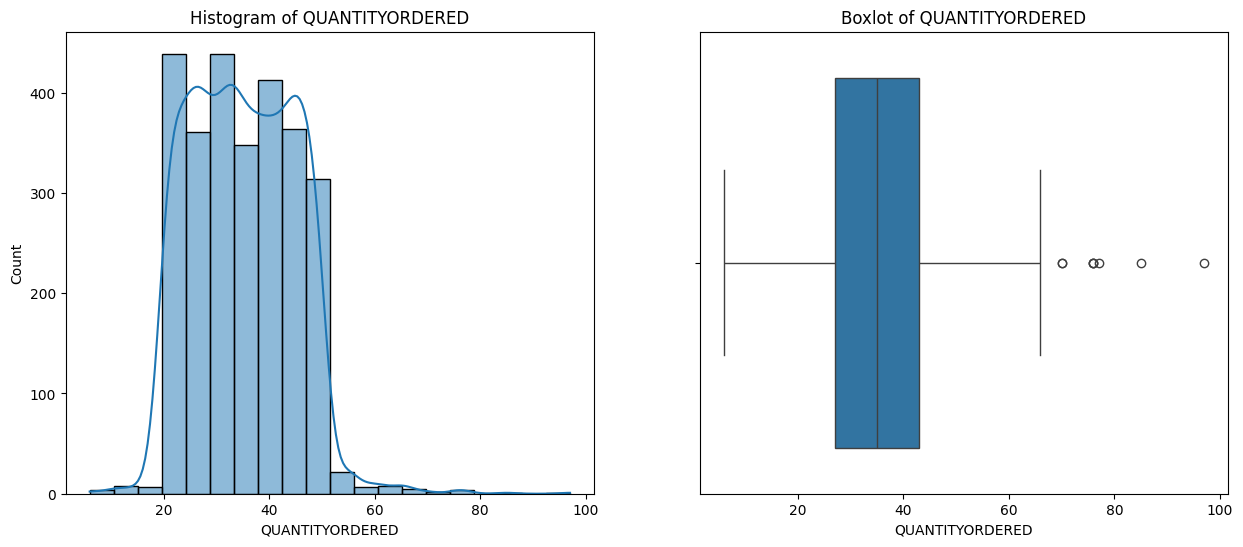

Description of PRICEEACH
----------------------------------------------------------------------------
count    2747.000000
mean      101.098952
std        42.042549
min        26.880000
25%        68.745000
50%        95.550000
75%       127.100000
max       252.870000
Name: PRICEEACH, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


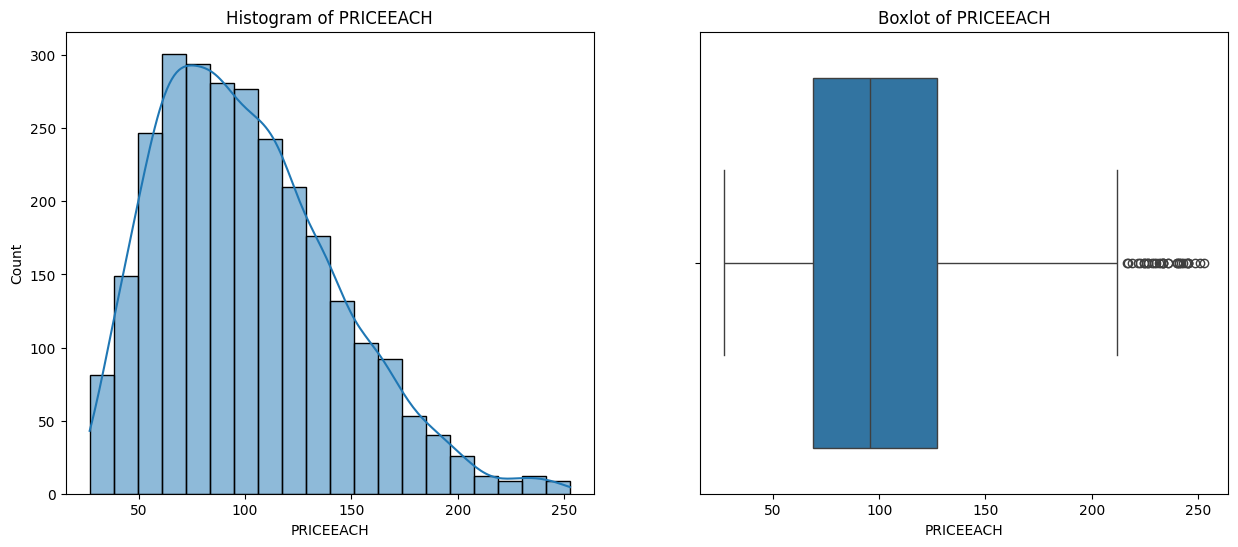

Description of ORDERLINENUMBER
----------------------------------------------------------------------------
count    2747.000000
mean        6.491081
std         4.230544
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        18.000000
Name: ORDERLINENUMBER, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


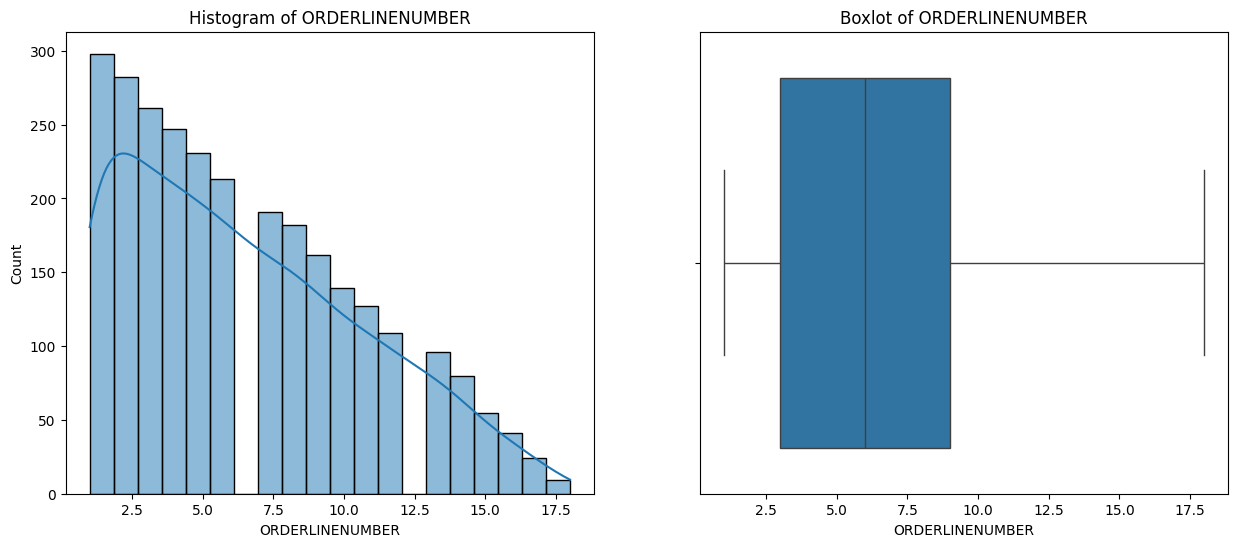

Description of SALES
----------------------------------------------------------------------------
count     2747.000000
mean      3553.047583
std       1838.953901
min        482.130000
25%       2204.350000
50%       3184.800000
75%       4503.095000
max      14082.800000
Name: SALES, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


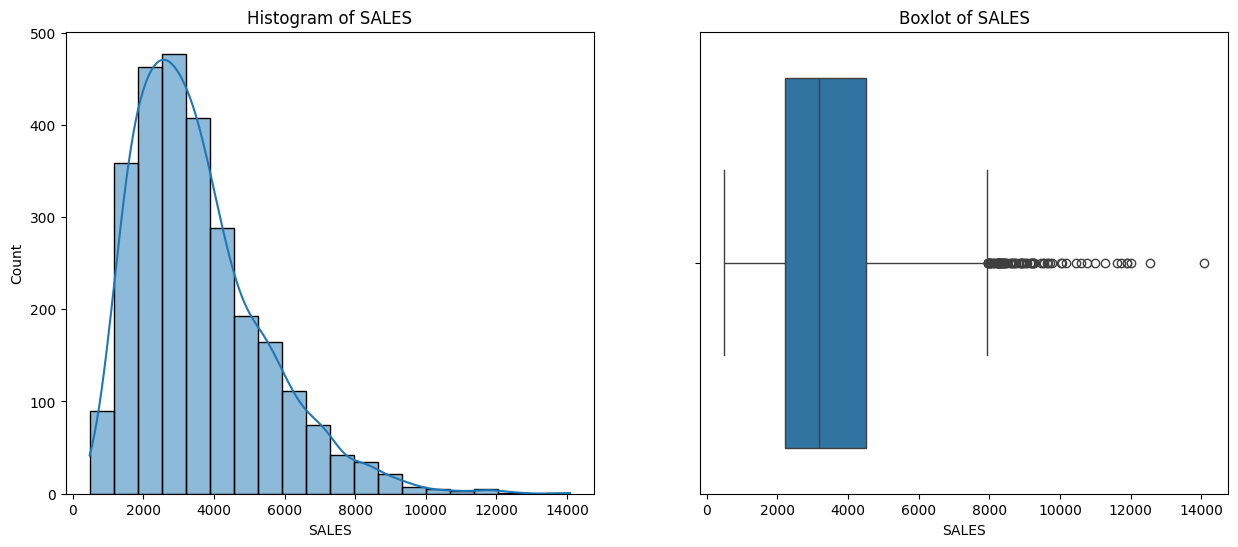

Description of MSRP
----------------------------------------------------------------------------
count    2747.000000
mean      100.691664
std        40.114802
min        33.000000
25%        68.000000
50%        99.000000
75%       124.000000
max       214.000000
Name: MSRP, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


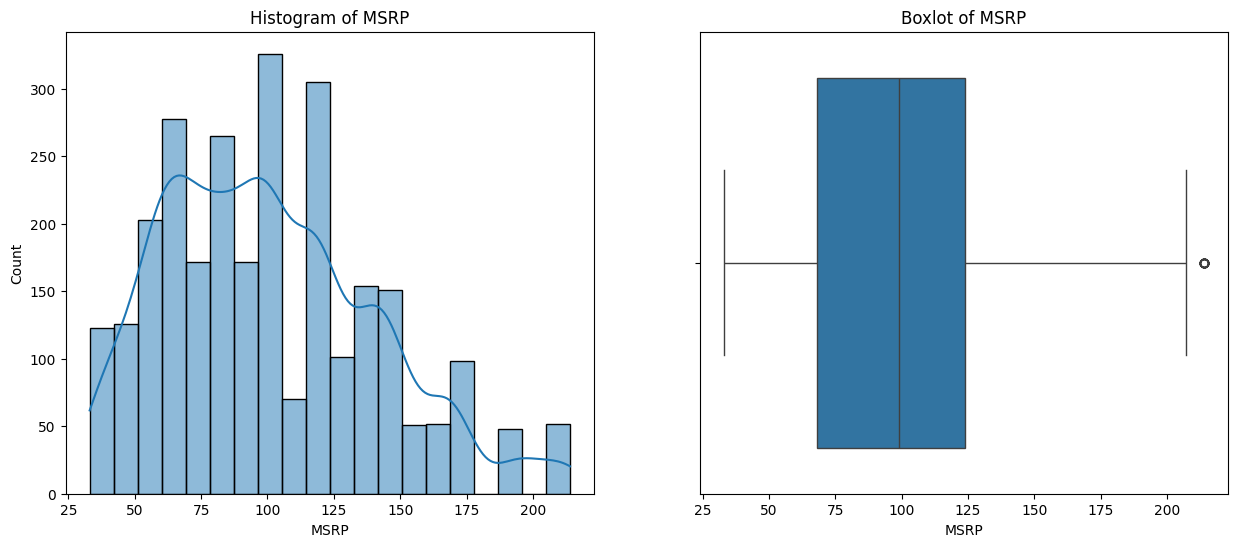

Description of DAYS_SINCE_LASTORDER
----------------------------------------------------------------------------
count    2747.000000
mean      384.085912
std       230.231295
min         1.000000
25%       197.000000
50%       343.000000
75%       571.000000
max       877.000000
Name: DAYS_SINCE_LASTORDER, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


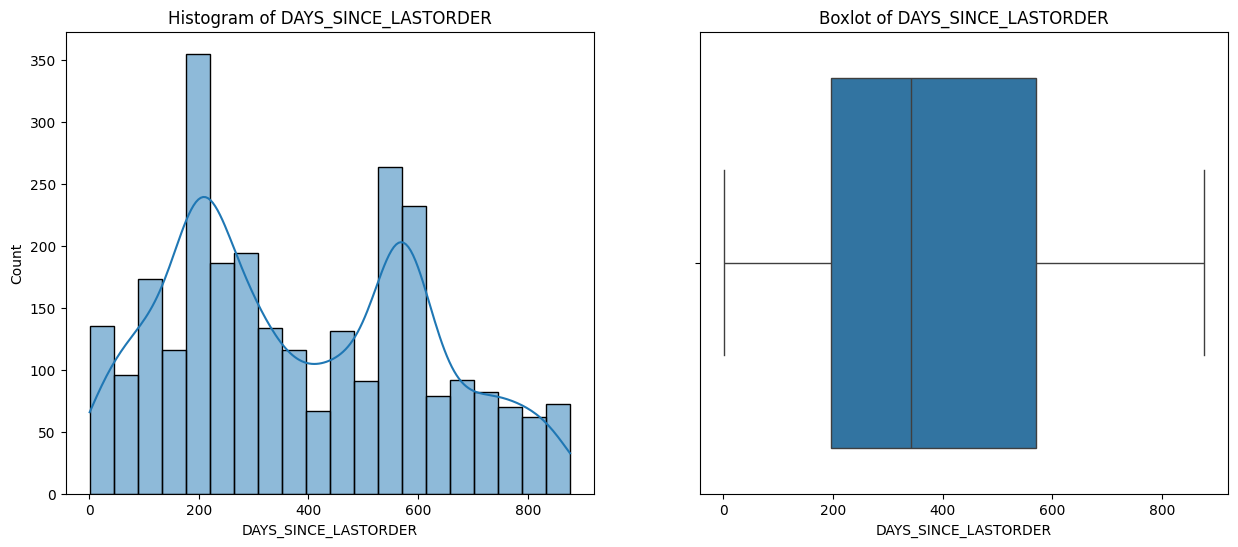

In [22]:
def univariateAnalysis_numeric(column, nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(), end=' ')
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    # Plot histogram
    print("----------------------------------------------------------------------------")
    sns.histplot(df[column], bins=nbins, kde=True, ax=axes[0])
    axes[0].set_title("Histogram of " + column)
    # Plot violin plot
    print("----------------------------------------------------------------------------")
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title("Boxlot of " + column )
    plt.show()
for x in df_num:
    univariateAnalysis_numeric(x,20)


In [23]:
#Top 10 Counteries
country_counts = df['COUNTRY'].value_counts()[:10]
fig = go.Figure(go.Funnel(y=country_counts.index,
    x=country_counts.values, textinfo='value', marker={'color': px.colors.sequential.Blues_r}))
fig.update_layout(title_text='Top 10 Country Distribution',  template='plotly_white')
fig.show()

In [24]:
#Top 10 Cities
city_counts = df['CITY'].value_counts()[:10]
fig = go.Figure(go.Funnel(    y=city_counts.index,
    x=city_counts.values,      textinfo='value',
    marker={'color': px.colors.sequential.Blues_r} ))
fig.update_layout(title_text='Top 10 City Distribution', template='plotly_white')
fig.show()

In [25]:
#Top 10 Customer
top10customer = df.sort_values(by="SALES", ascending = False).head(5)
top10customer = df['CUSTOMERNAME'].value_counts()[:10]
fig = go.Figure(go.Funnel(  y=top10customer.index, x=top10customer.values,
    textinfo='value', marker={'color': px.colors.sequential.Blues_r}))
fig.update_layout(title_text='Top 10 Customer Distribution', template='plotly_white')
fig.show()

<a id="toc"></a>

<a href="#toc" style="background-color: #ad8b2b; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>
## <b><span style='color:#fa762f'> </span><span style='color:#b58a12'> Bivariate Analysis</span></b>

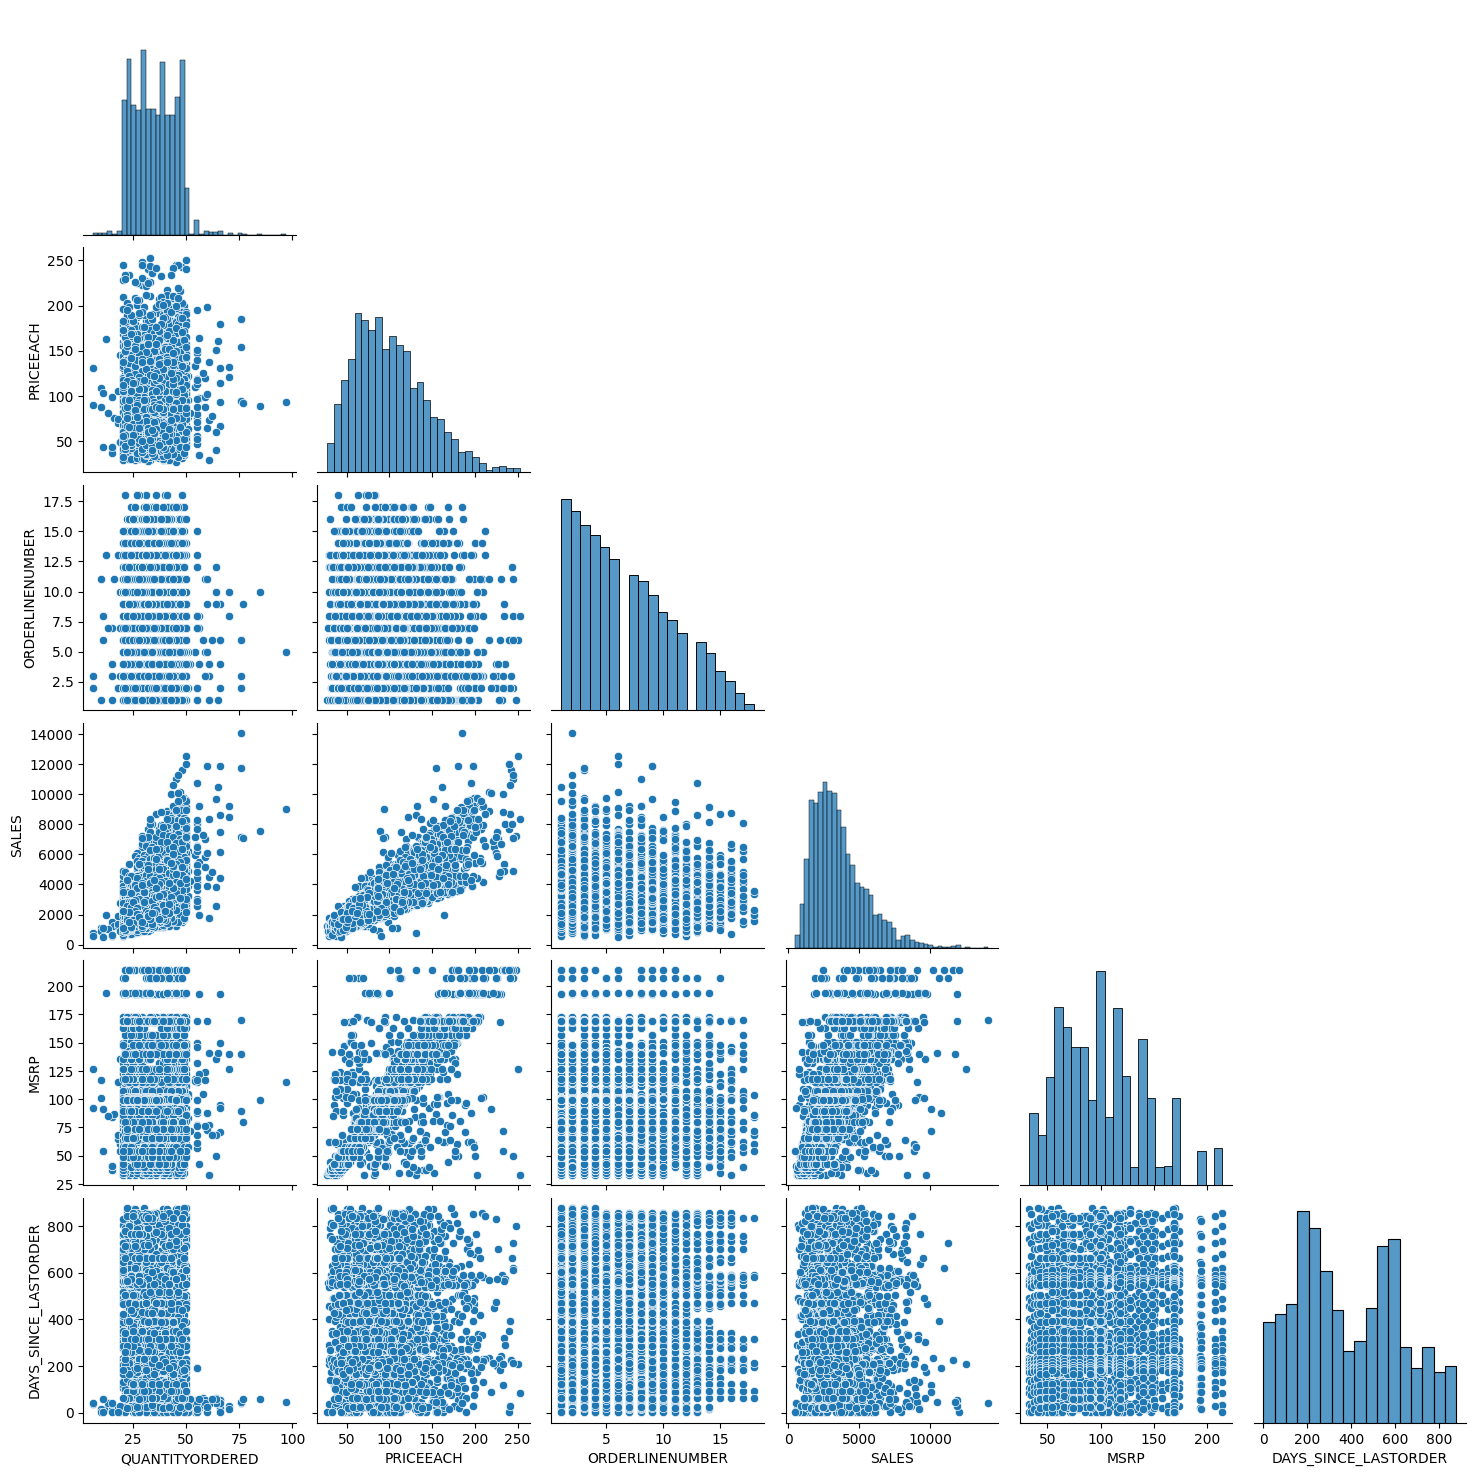

In [26]:
sns.pairplot(data=df_num, corner = True )

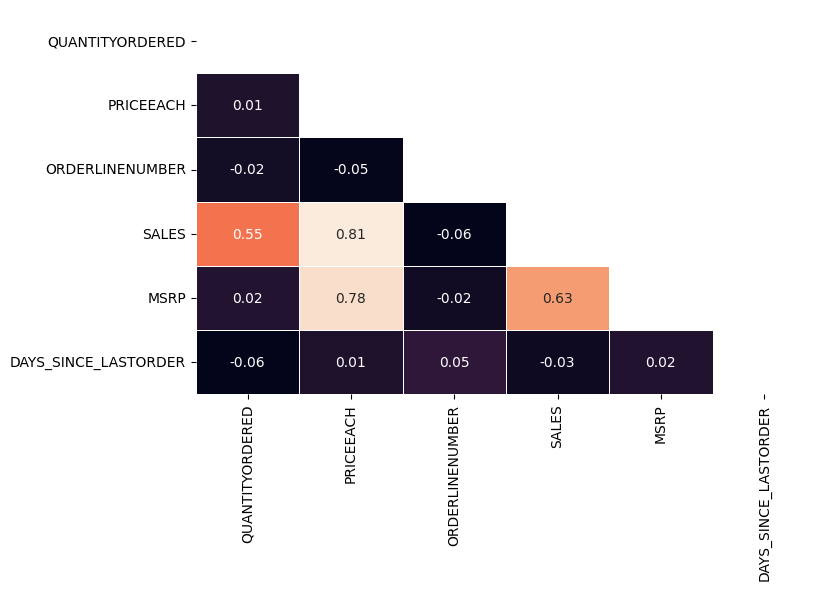

In [27]:
corr = df_num.corr(method='pearson')
mask = np.triu(np.ones_like(corr))
fig = plt.subplots(figsize=(8, 5))
sns.heatmap(corr, annot=True,fmt='.2f',mask=mask, cbar=None, linewidth=0.5)
plt.show()


### <b><span style='color:#fa762f'> </span><span style='color:#ad8b2b'> Correlation </span></b>

<div style="border-radius: 1px; border: # solid; padding: 1px; background-color: #fcf8e3; font-size: 150%; text-align: left;">

1. **Quantity Ordered and Sales**: When customers order more items (`QUANTITYORDERED`), it's often associated with higher sales (`SALES`). So, the more customers buy, the more the company earns in sales.
2. **Price and Sales**: There's a strong connection between the price of each item (`PRICEEACH`) and the total sales (`SALES`). When items are priced higher, the company tends to make more in sales. So, pricing plays a significant role in revenue.
3. **MSRP and Price**: The price at which items are sold (`PRICEEACH`) is closely related to the manufacturer's suggested retail price (`MSRP`). In most cases, the selling price is quite similar to what the manufacturer recommends.
4. **Days Since Last Order**: The time elapsed since a customer's last order (`DAYS_SINCE_LASTORDER`) has a weak connection with the quantity of items ordered. Customers who order more frequently may tend to buy smaller quantities, but this relationship isn't very strong.


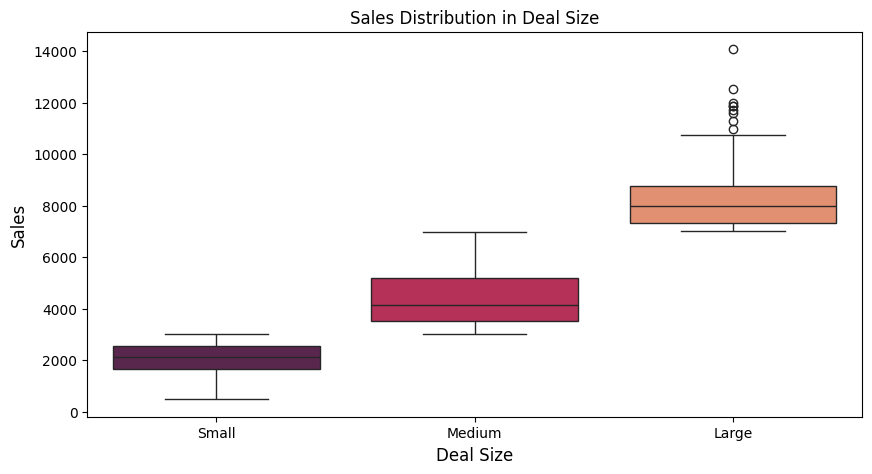

In [28]:
#Sales Distribution in Deal Size
plt.figure(1 , figsize = (10,5))
sns.boxplot(x = 'DEALSIZE' , y = 'SALES' , data = df, palette='rocket')
plt.title('Sales Distribution in Deal Size')
plt.xlabel("Deal Size", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation = 0)
plt.show()


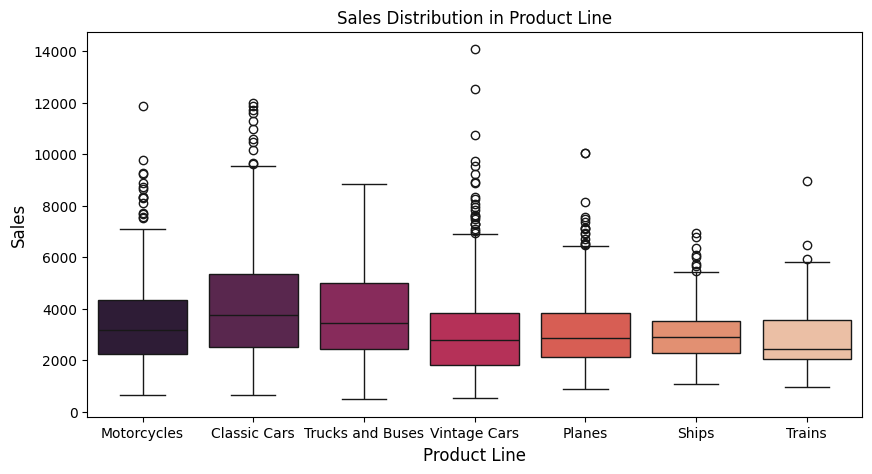

In [29]:
#Sales Distribution in Product Line
plt.figure(1 , figsize = (10,5))
sns.boxplot(x = 'PRODUCTLINE' , y = 'SALES' , data = df, palette='rocket')
plt.title('Sales Distribution in Product Line',fontsize=12)
plt.xlabel("Product Line", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.show()


<a id="toc"></a>

<a href="#toc" style="background-color: #ad8b2b; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

## <b><span style='color:#fa762f'> </span><span style='color:#b58a12'> Yearly, Quarterly, Monthly, weekly Sales Trend</span></b>

In [30]:
# Extract year, month, week, and quarter from ORDERDATE
df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df['Week'] = df['ORDERDATE'].dt.isocalendar().week
df['Quarter'] = df['ORDERDATE'].dt.quarter

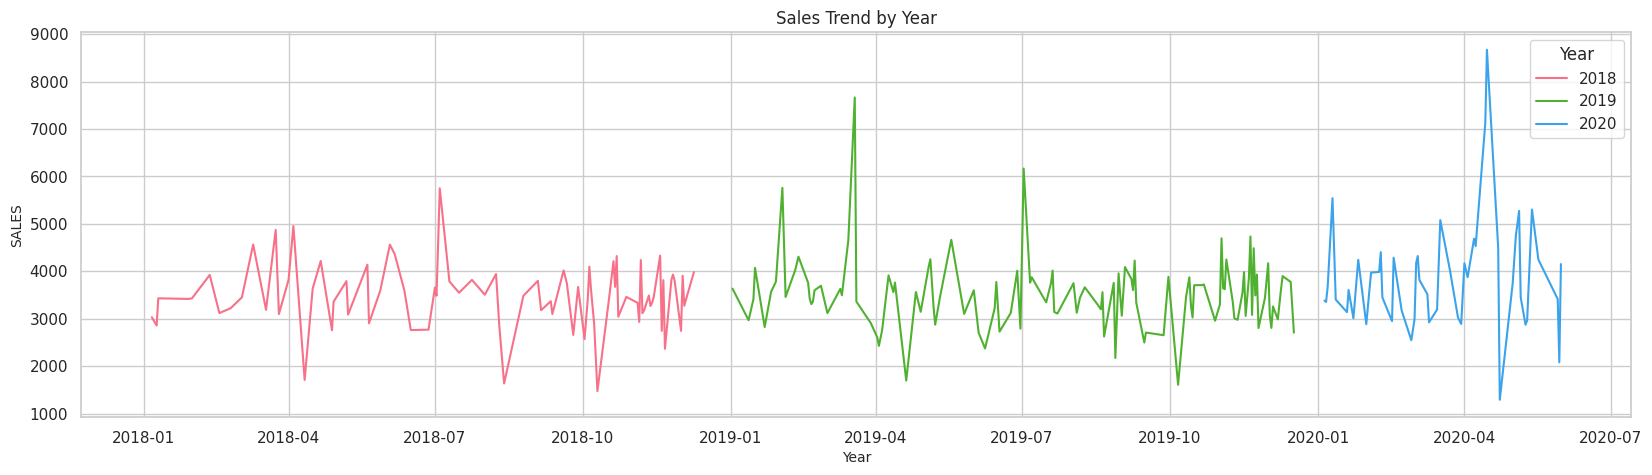

In [31]:
# Sales trend by Year
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="ORDERDATE", y="SALES", ci=None, hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Year")
plt.xlabel("Year", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

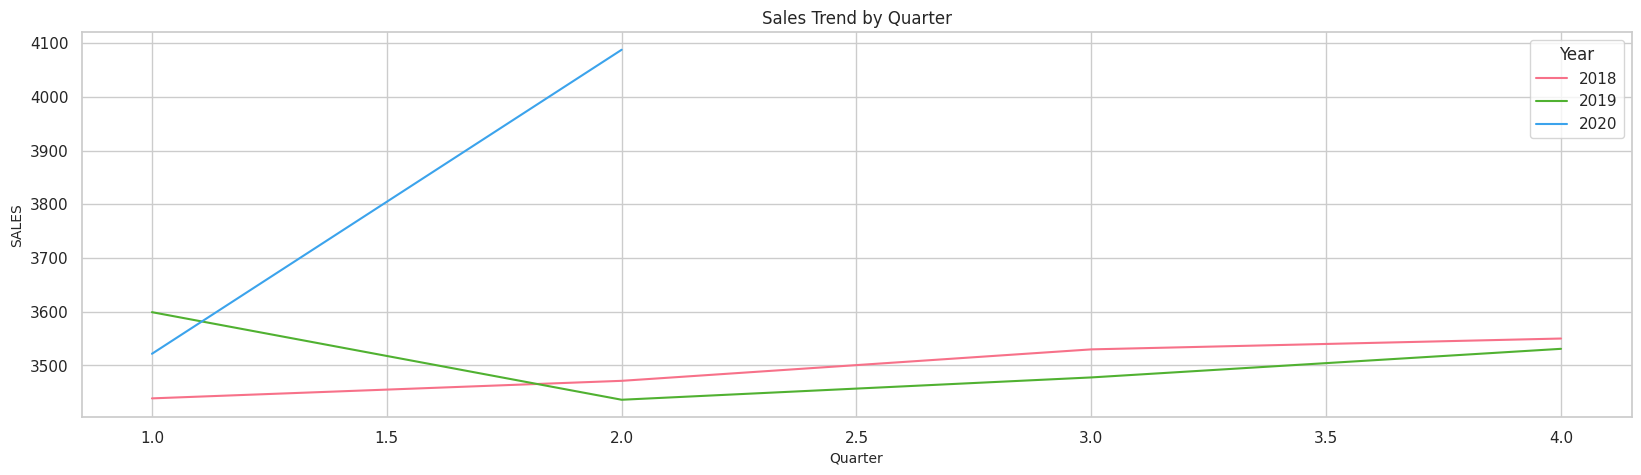

In [32]:
# Sales trend by Quarter
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Quarter", y="SALES", ci=None, hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Quarter")
plt.xlabel("Quarter", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()


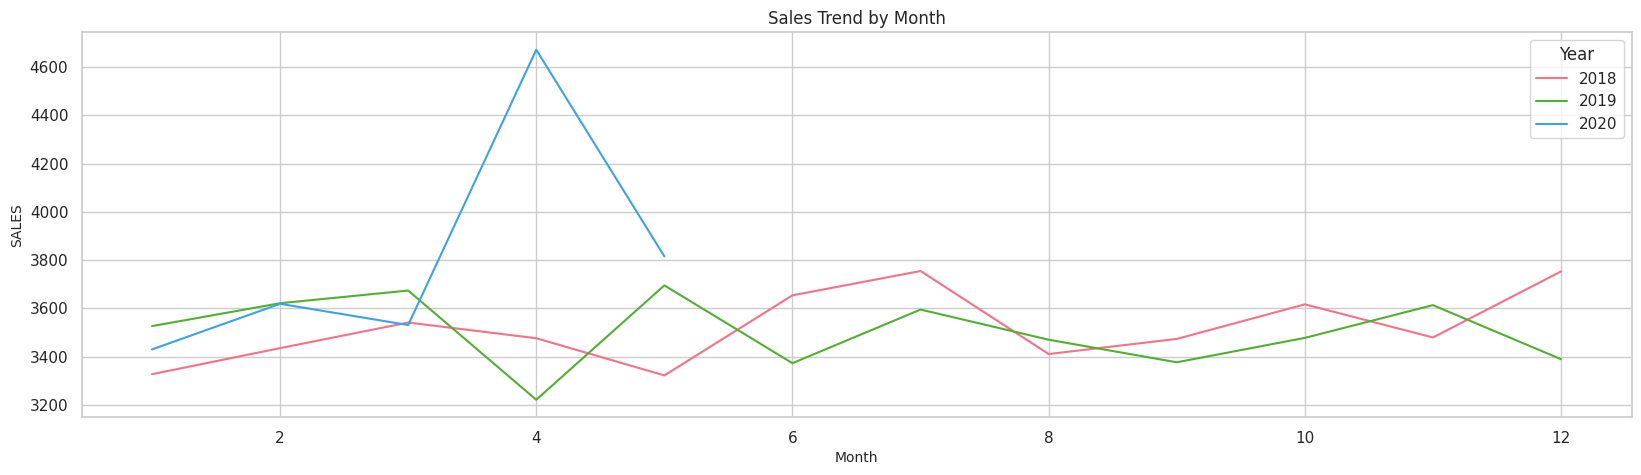

In [33]:
# Sales trend by Month
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Month", y="SALES", ci=None, hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Month")
plt.xlabel("Month", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()


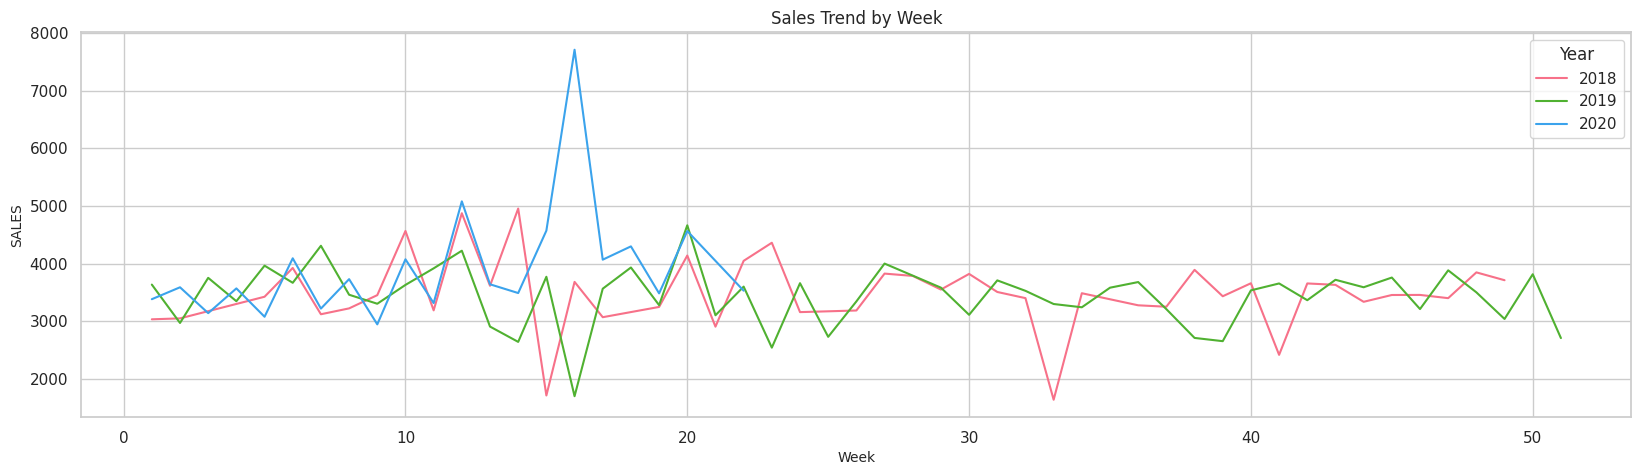

In [34]:
# Sales trend by Week
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Week", y="SALES", ci=None, hue="Year", palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Week")
plt.xlabel("Week", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

<a id="toc"></a>

<a href="#toc" style="background-color: #ad8b2b; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

## <b><span style='color:#fa762f'> </span><span style='color:#b58a12'> Multivariate Analysis</span></b>

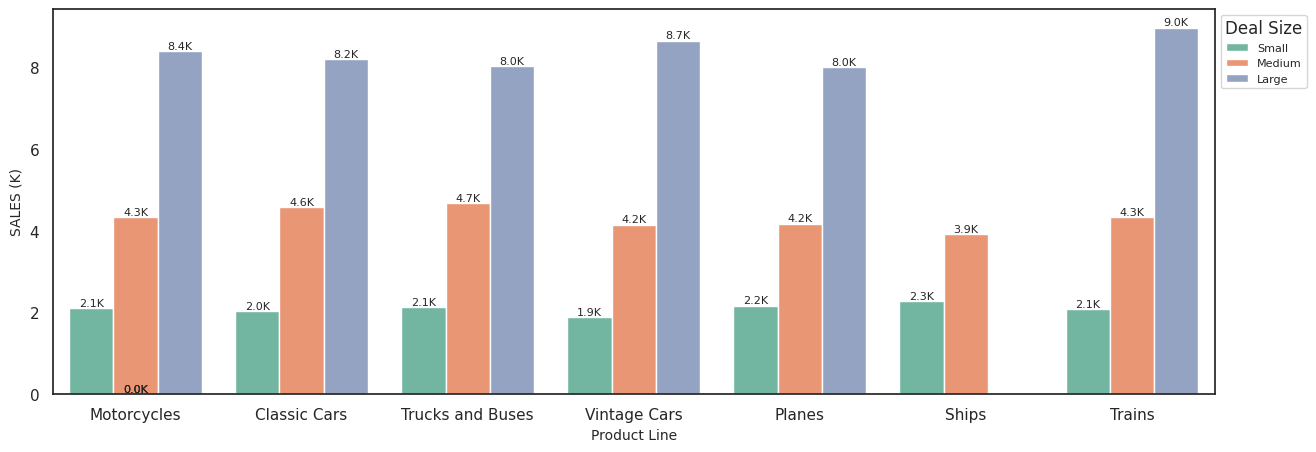

In [35]:
# Comparison between Sales, Product Line along with Dealsize as Hue
sns.set(style="white", rc={"figure.figsize": (15, 5)})
df["SALES (K)"] = df["SALES"] / 1000
sns.barplot(data=df, x="PRODUCTLINE", y="SALES (K)", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("SALES (K)", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)
plt.legend(title="Deal Size", fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


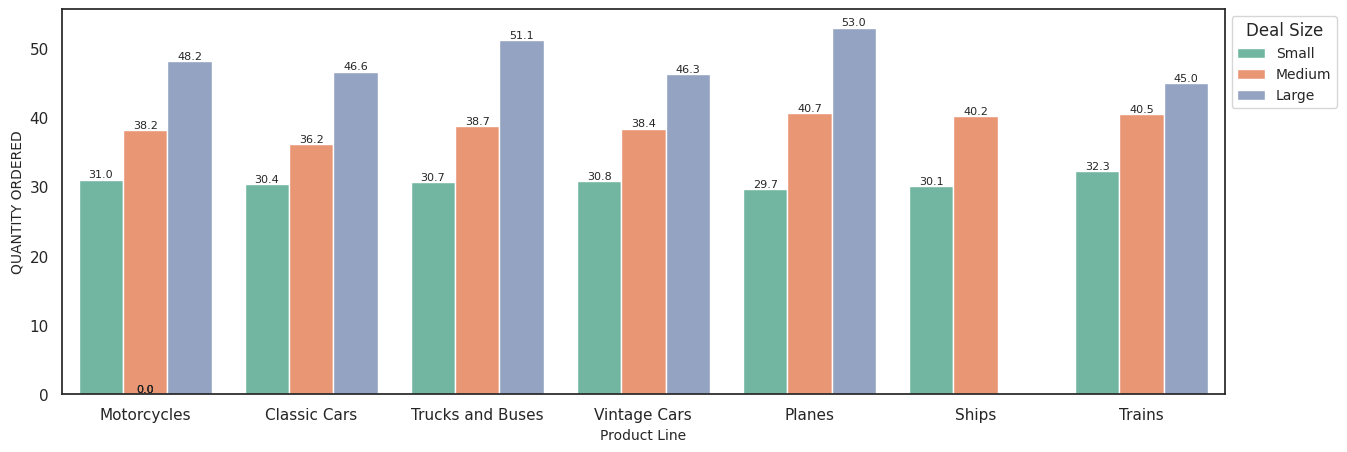

In [36]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="QUANTITYORDERED", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("QUANTITY ORDERED", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size", fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


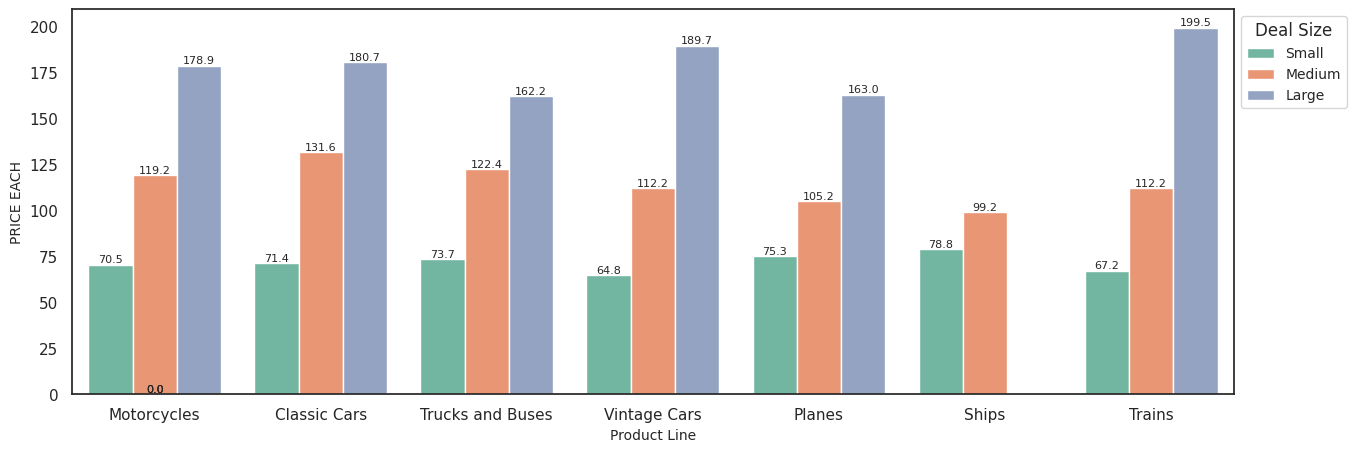

In [37]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="PRICEEACH", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("PRICE EACH", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


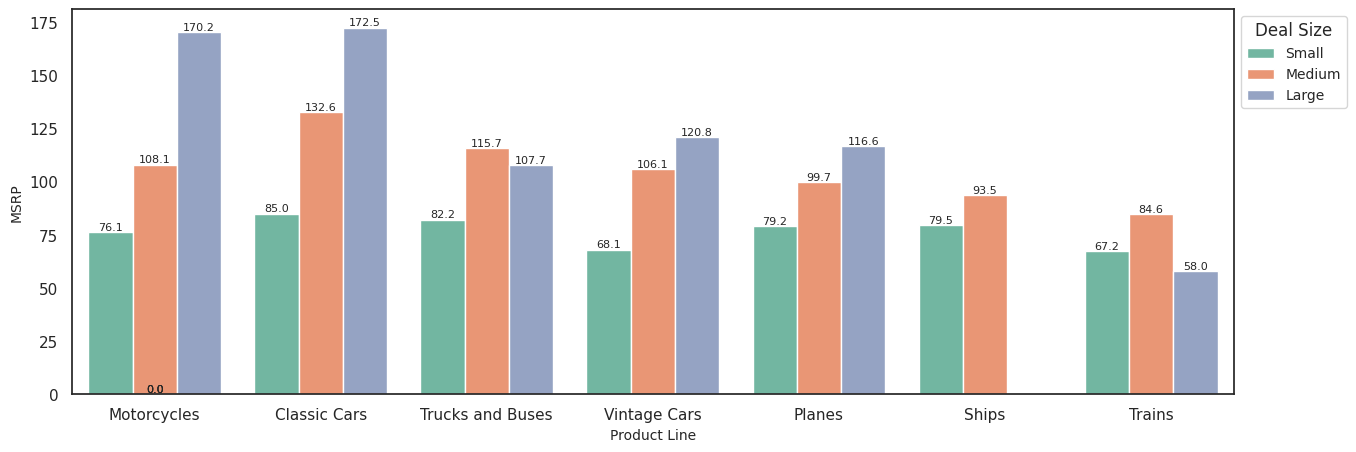

In [38]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="MSRP", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("MSRP", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


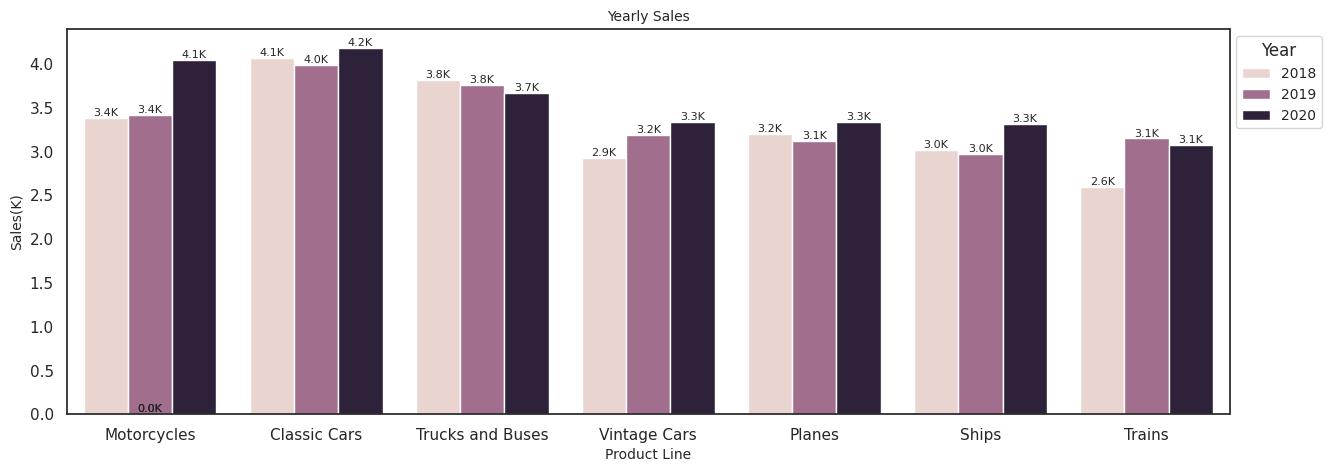

In [39]:
sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="SALES (K)", hue="Year",  ci=None)
plt.xlabel("Product Line", fontsize=10)
plt.ylabel("Sales(K)", fontsize=10)
plt.title("Yearly Sales", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Year",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


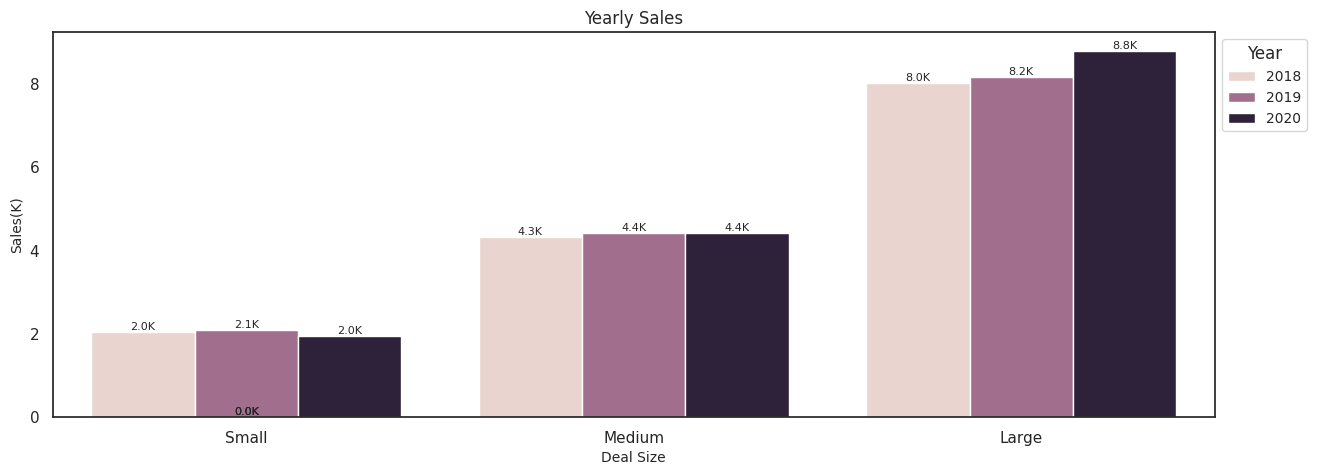

In [40]:
sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="DEALSIZE", y="SALES (K)", hue="Year",  ci=None)
plt.xlabel("Deal Size", fontsize=10)
plt.ylabel("Sales(K)", fontsize=10)
plt.title("Yearly Sales", fontsize=12)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Year",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


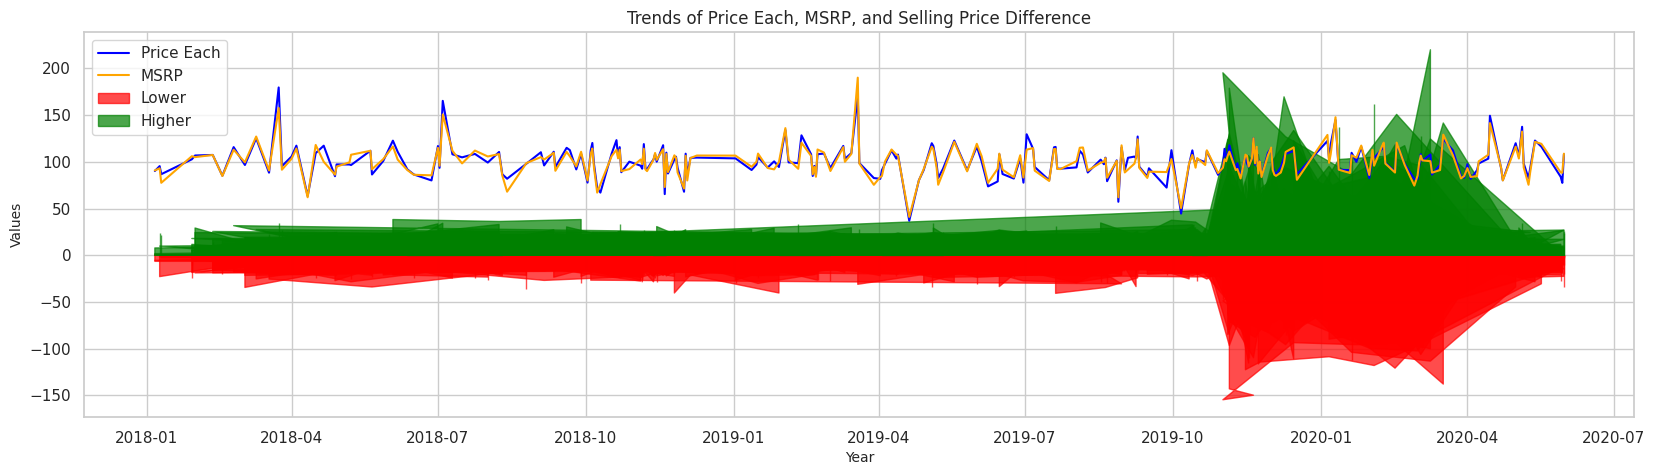

In [41]:
#Trend of Price, MSRP and Selling Price Difference
# Selling Price Difference is calculated as the difference between manufactured suggested price and selling price
df["SELLING_PRICE_DIFF"] =  df["PRICEEACH"]-df["MSRP"]
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="ORDERDATE", y="PRICEEACH", ci=None, label="Price Each", color='blue')
sns.lineplot(data=df, x="ORDERDATE", y="MSRP", ci=None, label="MSRP", color='orange')
plt.fill_between(df["ORDERDATE"], df["SELLING_PRICE_DIFF"], where=(df["SELLING_PRICE_DIFF"] < 0), color="red", alpha=0.7, label="Lower")
plt.fill_between(df["ORDERDATE"], df["SELLING_PRICE_DIFF"], where=(df["SELLING_PRICE_DIFF"] >= 0), color="green", alpha=0.7, label="Higher")
plt.title("Trends of Price Each, MSRP, and Selling Price Difference")
plt.xlabel("Year", fontsize=10)
plt.ylabel("Values", fontsize=10)
plt.legend(loc='best')
plt.show()

<a id="toc"></a>


## <b><span style='color:#fa762f'> </span><span style='color:#ad8b2b'> Key Insights from Analysis </span></b>

<div style="border-radius: 1px; border: # solid; padding: 1px; background-color: #fcf8e3; font-size: 140%; text-align: left;">
  
**Sales Overview:**
- **298 orders** placed by **89 customers** from **19 countries** in the last **2.5 years**.
- **United States** leads in sales, followed by **Spain** and **France**. Notable sales from **Australia** and **Singapore** in the Eastern Hemisphere.
- Among cities, **Madrid** tops sales, with **San Diego** and **New York City** following.
- In the Eastern Hemisphere, sales from **Australia** and **Singapore** declined, while customers from **Japan** were added in **2019**.
- Significant sales increase observed in **US** and **France** in **2019**.

**Product and Revenue:**
- The company manufactures **109 automobile parts** under **7 product lines** with prices ranging from **26 to 252**.
- **Classic Car parts** generate the maximum revenue through sales (approx. **40%**).
- **Car, Truck, Bus, and Motorcycle parts** account for **80%** of the company's revenue.

**Sales Trends:**
- Upward sales trend with **monthly seasonality**. Peak sales in **October and November** annually.
- Higher sales and customer activity in the **early months of 2020** compared to previous years.

**Concern**
- **No new customers** added since **September 2019**.

**Transaction Characteristics:**
- Most deals are of **medium and small size**, with transactions typically containing **20 to 50 items**.

**Key Customers:**
- **Euro Shopping Channel** and **Mini Gifts Distribution Ltd.** are **best customers** (highest spending, most frequent, and recent).

**Customer Retention:**
- A good **customer retention rate of approximately 90%** was observed in **2019**.

<center><img src="https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcTOKfc3vuMGQelwcBZSnkgSI9gWf_Xy4i-8z9iLLC5RxSdhy9NQ" alt="Image" width="600" height="350"></center>

<a id="toc"></a>

<a href="#toc" style="background-color: #ad8b2b; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

---
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#ad8b2b;">
    <em>Appreciate your time exploring my work. If you enjoyed it, kindly consider upvoting or feel free to drop comment / feedback to help enhance the notebook. Happy Learning!</em>
</p>


<center><img src='https://i.pinimg.com/originals/78/64/9e/78649e30de4bd74262691f489800ebb9.gif'
     height=100px width=500px /></center>
    
